<a href="https://colab.research.google.com/github/ansehoon1999/MG-DataAnaylsis/blob/main/%EC%84%B8%ED%9B%88/DataAnaylsis_7_24_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 노년층 관광 데이터 조사

In [1]:
from google.colab import drive 

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
filename_2020 = '/content/gdrive/MyDrive/2020_travel_ok.csv'
filename_2019 =  '/content/gdrive/MyDrive/2019_travel_ok.csv'

In [3]:
import pandas as pd
import numpy as np

data_2020 = pd.read_csv(filename_2020)
df_2020 = pd.DataFrame(data_2020)
df_2020.head()

print('2020년 데이터 개수: ', len(data_2020))

data_2019 = pd.read_csv(filename_2019)
df_2019 = pd.DataFrame(data_2019)
df_2019.head()

print('2019년 데이터 개수: ', len(data_2019))




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,213,316,419,1152,2047) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2020년 데이터 개수:  15592


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,127,199,211,283,295,367,451,535,619,1016) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2019년 데이터 개수:  48269


1, 2 월달 편입 -> 코로나 전/후로 나누기

In [4]:

df_mon_1 = df_2020.groupby('BMON').get_group(1)
df_mon_2 = df_2020.groupby('BMON').get_group(2)

#코로나 이전 데이터셋
df_before = pd.concat([df_2019, df_mon_1, df_mon_2])

print(len(df_before))

50940


In [5]:
#코로나 이후 데이터셋
idx = df_2020[df_2020['BMON'] <= 2].index

df_after = df_2020.drop(idx)
print(len(idx))

print(len(df_after))


2671
12921


- 코로나 전 데이터셋: 50940
- 코로나 후 데이터셋: 12921

#폰트 설치

In [6]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [7]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [8]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 코로나 이전 성별

BSEX                      1
ID      11010550341_1000000
Name: 0, dtype: object
MALE:  25373
FEMALE:  25567
TOTAL:  50940


<BarContainer object of 2 artists>

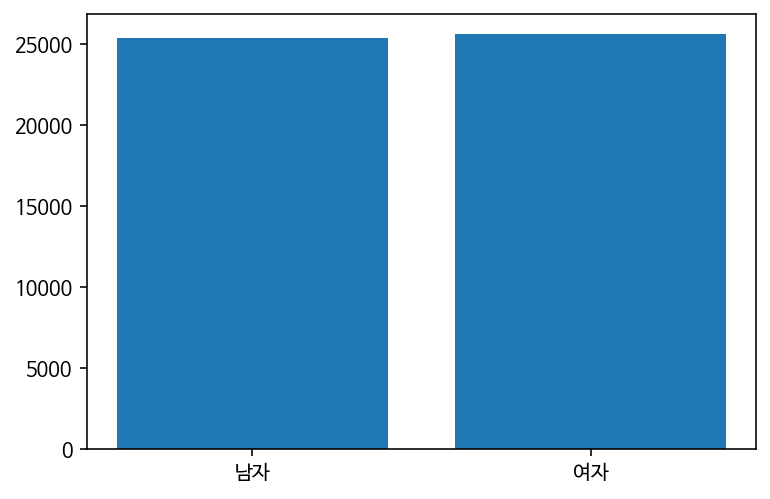

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt

df_sex = df_before[['BSEX', 'ID']]
print(df_sex.iloc[0, :])

m_count = 0
f_count = 0

for i in range(len(df_sex)) :
  if df_sex.iloc[i,0] == 1 :
    m_count = m_count + 1
  elif df_sex.iloc[i, 0] == 2:
    f_count = f_count + 1


print("MALE: ", m_count)
print("FEMALE: ",f_count)  
total = m_count + f_count
print("TOTAL: ", total)  

plt.bar(["남자", "여자"], [m_count, f_count])


# 코로나 이전 여가 활동

1. 자연 및 풍경감상
2. 음식관광(지역 맛집 등)
3. 야외위락 및 스포츠, 레포츠
활동
4. 역사유적지방문
5. 테마파크, 놀이시설,
동/식물원방문
6. 휴식/휴양
7. 온천/스파
8. 쇼핑
9. 지역 문화예술/공연/
전시시설 관람
10. 스포츠 경기관람
11. 지역 축제/이벤트 참가
12. 교육/체험프로그램 참가
13. 종교/성지순례
14. 카지노, 경마, 경륜 등
15. 시티투어
16. 드라마 촬영지 방문
17. 유흥/오락
18. 가족/친지/친구 방문
19. 회의참가/시찰

In [10]:
df_before =  df_before[['ID', 'A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8', 'A3_9', 'A3_10', 'A3_11', 'A3_12', "A3_13", 'A3_14', 'A3_15', 'A3_16', 'A3_17', 'A3_18', 'A3_19', 'A3_20']]


In [16]:
act_newlist =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
count = 0

for i in range(len(df_before)) :
  if df_before.iloc[i, 1] == 1 or df_before.iloc[i, 1] == '1' :
    act_newlist[0] = act_newlist[0] + 1

  if df_before.iloc[i, 2] == 2 or df_before.iloc[i, 1] == '2' :
    act_newlist[1] = act_newlist[1] + 1

  if df_before.iloc[i, 3] == 3 or df_before.iloc[i, 1] == '3' :
    act_newlist[2] = act_newlist[2] + 1

  if df_before.iloc[i, 4] == 4 or df_before.iloc[i, 1] == '4' :
    act_newlist[3] = act_newlist[3] + 1

  if df_before.iloc[i, 5] == 5  or df_before.iloc[i, 1] == '5' :
    act_newlist[4] = act_newlist[4] + 1

  if df_before.iloc[i, 6] == 6  or df_before.iloc[i, 1] == '6' :
    act_newlist[5] = act_newlist[5] + 1

  if df_before.iloc[i, 7] == 7  or df_before.iloc[i, 1] == '7' :
    act_newlist[6] = act_newlist[6] + 1

  if df_before.iloc[i, 8] == 8 or df_before.iloc[i, 1] == '8' :
    act_newlist[7] = act_newlist[7] + 1

  if df_before.iloc[i, 9] == 9 or df_before.iloc[i, 1] == '9' :
    act_newlist[8] = act_newlist[8] + 1

  if df_before.iloc[i, 10] == 10 or df_before.iloc[i, 1] == '10' :
    act_newlist[9] = act_newlist[9] + 1

  if df_before.iloc[i, 11] == 11 or df_before.iloc[i, 1] == '11' :
    act_newlist[10] = act_newlist[10] + 1

  if df_before.iloc[i, 12] == 12 or df_before.iloc[i, 1] == '12' :
    act_newlist[11] = act_newlist[11] + 1

  if df_before.iloc[i, 13] == 13 or df_before.iloc[i, 1] == '13' :
    act_newlist[12] = act_newlist[12] + 1

  if df_before.iloc[i, 14] == 14 or df_before.iloc[i, 1] == '14' :
    act_newlist[13] = act_newlist[13] + 1

  if df_before.iloc[i, 15] == 15 or df_before.iloc[i, 1] == '15' :
    act_newlist[14] = act_newlist[14] + 1

  if df_before.iloc[i, 16] == 16  or df_before.iloc[i, 1] == '16' :
    act_newlist[15] = act_newlist[15] + 1

  if df_before.iloc[i, 17] == 17 or df_before.iloc[i, 1] == '17' :
    act_newlist[16] = act_newlist[16] + 1

  if df_before.iloc[i, 18] == 18 or df_before.iloc[i, 1] == '18' :
    act_newlist[17] = act_newlist[17] + 1

  if df_before.iloc[i, 19] == 19 or df_before.iloc[i, 1] == '19' :
    act_newlist[18] = act_newlist[18] + 1

print(act_newlist)

[17638, 11930, 1013, 2363, 1734, 12786, 735, 1794, 990, 45, 1151, 358, 532, 19, 1148, 995, 748, 3306, 158]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

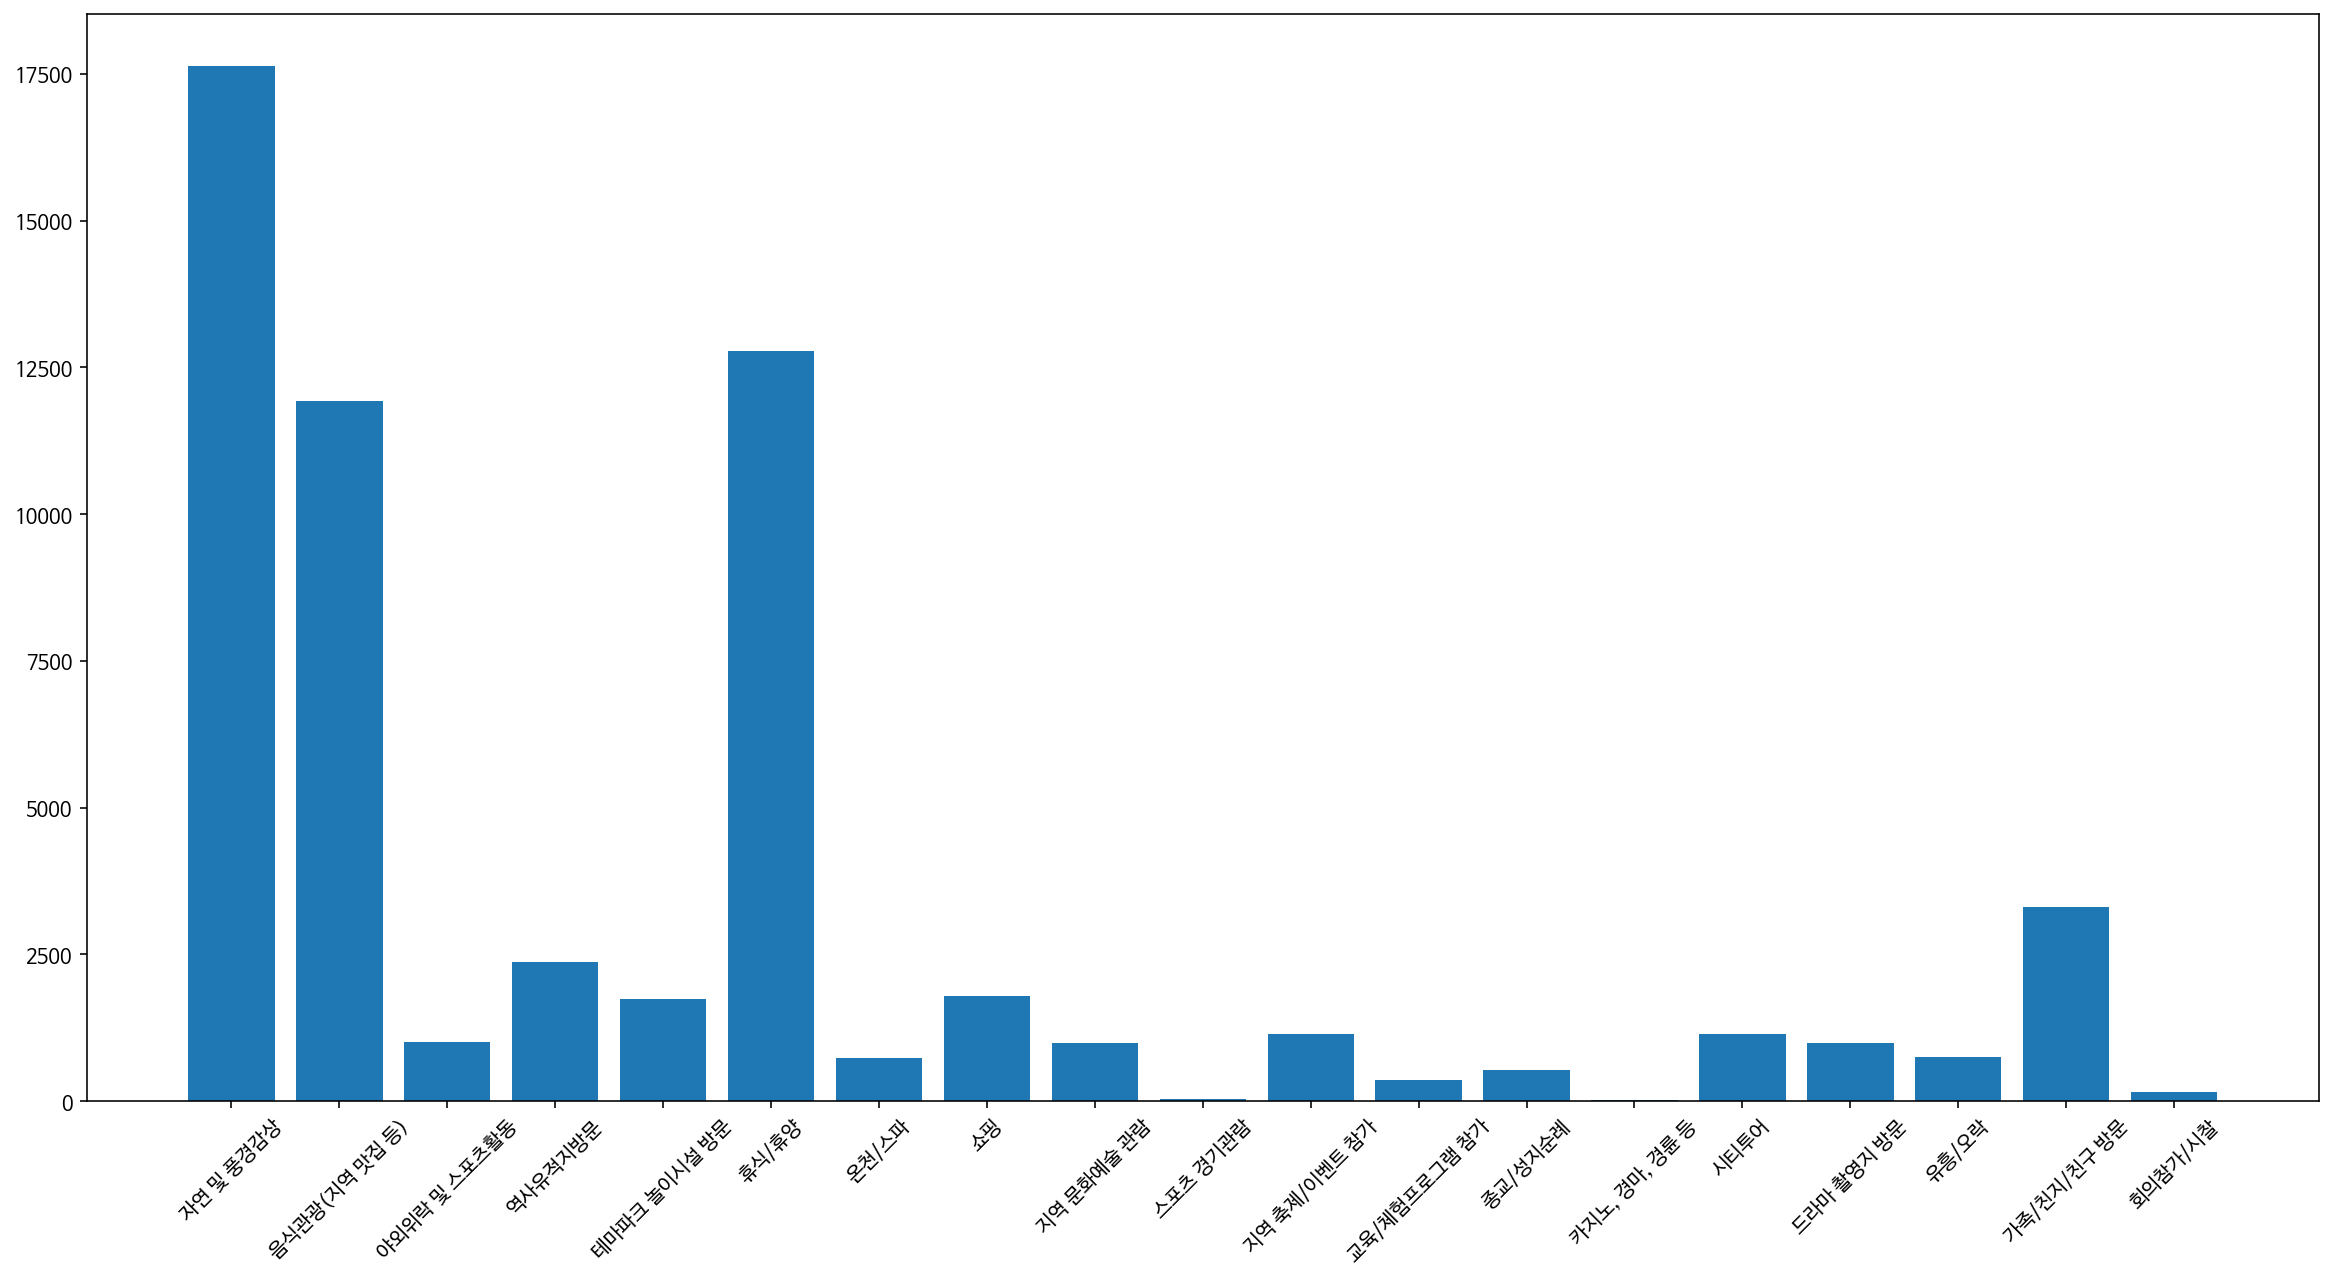

In [28]:
import seaborn as sns


column_list = ['자연 및 풍경감상', '음식관광(지역 맛집 등)', '야외위락 및 스포츠활동', '역사유적지방문', '테마파크 놀이시설 방문', '휴식/휴양', '온천/스파', '쇼핑', '지역 문화예술 관람', '스포츠 경기관람', '지역 축제/이벤트 참가', '교육/체험프로그램 참가', '종교/성지순례', '카지노, 경마, 경륜 등', '시티투어', '드라마 촬영지 방문', '유흥/오락', '가족/친지/친구 방문', '회의참가/시찰']
plt.figure(figsize=(20,10))
plt.bar(column_list, act_newlist)
plt.xticks(rotation = 45)